# Master SQL Fundamentals Effortlessly as a Pandas User
## There was a time it was the other way around
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@itssammoqadam?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Sam Moqadam</a>
        on 
        <a href='https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Unsplash</a>
    </strong>
</figcaption>

### Motivation

When Pandas package gained public exposure in 2009, SQL had been dominating the data world since 1974. Pandas came with an attractive set of features such as in-built visualization, flexible data handling and became an ultimate data exploration tool. As it started gaining mass popularity, many courses and resources emerged teaching Pandas and comparing it to SQL.

Flash-forward to 2021, people are now getting introduced to the Pandas package *first* rather than the universal data language - SQL. Even though SQL is as popular as ever, the flexibility and multi-functionality of Pandas is making it the first choice for beginner data scientists.

Then, why do you need SQL if you know Pandas?

Even though Pandas may seem a better choice, SQL still plays a crucial role in day-to-day job of a data scientist. In fact, SQL is the second most in-demand and the third most growing programming language for data science (see [here](https://towardsdatascience.com/the-most-in-demand-skills-for-data-scientists-in-2021-4b2a808f4005)). So, it is a must to add SQL to your CV if you want to get a job in the field. And knowing Pandas, learning SQL should be a breeze, as you will see in this article.

### Connecting to a Database

Setting up an SQL workspace and connecting to a database can be a real pain in the neck. First, you need to install your favorite SQL flavor (PostgreSQL, MySQL, etc.) and download an SQL IDE too. Doing all those here would deviate us from the purpose of the article, so we will use a shortcut. 

Specifically, we will directly run SQL queries in a Jupyter Notebook without any additional steps. All we need to do is install the `ipython-sql` package using pip:

```python
pip install ipython-sql
```

After the installation is done, start a new Jupyter session and run this command in the notebook:

```python
%load_ext sql
```
and you are all set!

To illustrate how basic SQL statements work, we will be using the Chinook database which can be downloaded [here](https://www.sqlitetutorial.net/sqlite-sample-database/). The database has 11 tables, each of which has its own name. 

To retrieve the data stored in this database's tables, run this command:

In [1]:
%sql sqlite:///data/chinook.db

The statement starts with `%sql` in-line magic command that tells the notebook interpreter we will be running SQL commands. It is followed by the path that our downloaded Chinook database is in. The valid paths should always start with `sqlite:///` prefix for SQLite databases. Above, we are connecting to the database that is stored in the 'data' folder of the current directory. If you want to pass an absolute path, the prefix should be with 4 forward slashes - `sqlite:////`

If you wish to connect to a different database flavor, you can refer to this [excellent article](https://towardsdatascience.com/heres-how-to-run-sql-in-jupyter-notebooks-f26eb90f3259).

### Taking a First Look at the Tables

The first thing we always do in Pandas is use the `.head()` function. Let's learn how to do that in SQL:

```sql
%%sql

SELECT * FROM customers
LIMIT 5
```

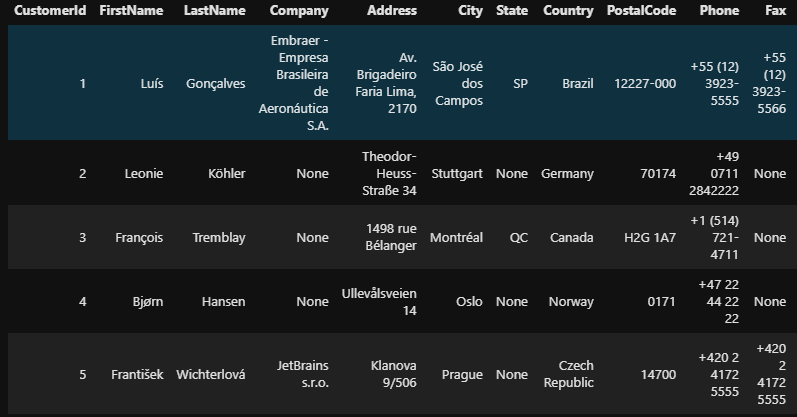

The first keyword in the above query is `SELECT`. It is equivalent to the brackets operator in Pandas where we select specific columns. But, the SELECT keyword is followed by a * (asterisk). * is an SQL operator that tells to select everything (all rows and columns) from a table specified after the `FROM` keyword. LIMIT is used to minimize the output returned. So, the above query is equivalent to `df.head()` function.

If you don't want to select all columns, you can specify one or more column names after the SELECT keyword:

```sql
%%sql

SELECT Name, Composer, UnitPrice
FROM tracks
LIMIT 10
```

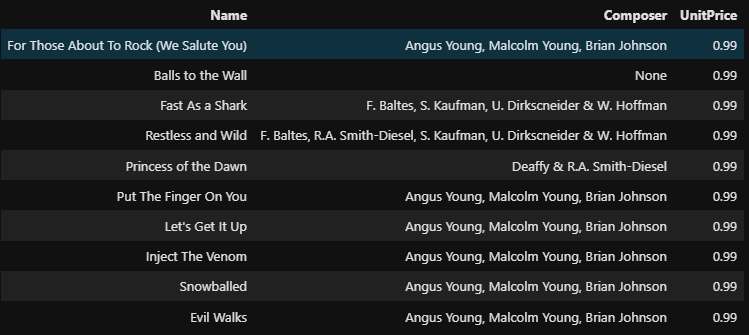

The equivalent Pandas operation is 
```python
tracks[['Name', 'Composer', 'UnitPrice']].head(10)
```

Another useful keyword in SQL is `DISTINCT`. Adding this keyword before any column name returns its unique values:

```sql
%%sql

SELECT DISTINCT FirstName
FROM employees

-- equivalent to `.value_counts()`
```

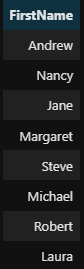

Comments in SQL are written with double dashes

### Counting the Number of Rows

Just like Pandas has `.shape` attribute on its DataFrames, SQL has a `COUNT` function to display the number of rows in a table:

```sql
%%sql

SELECT COUNT(*) FROM tracks
```

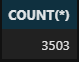

It is also possible to pass a column name to COUNT:

```sql
%sql SELECT COUNT(FirstName) FROM customers
```

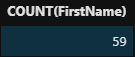

But the output would be the same as COUNT(\*). A more useful info would be counting the number of unique values in a particular column. We can do this by adding the DISTINCT keyword into COUNT:

```sql
%%sql 

SELECT COUNT(DISTINCT FirstName) FROM employees

-- equivalent to `employees['FirstName'].nunique()`
```

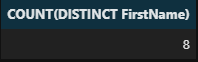

### Filtering Results With WHERE Clauses

Just looking and counting rows is pretty lame. Let's see how we can display rows based on conditions.

First, let's look at the songs which cost more than a dollar:

```sql
%%sql

SELECT * FROM tracks
WHERE UnitPrice > 1.0
LIMIT 10

--tracks[tracks['UnitPrice' > 1.0]]
```

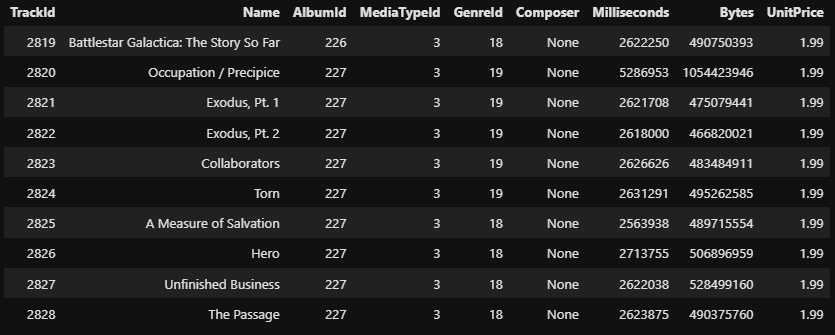

Conditional statements are written after in the WHERE clause which always comes after FROM and before the LIMIT keywords. Using conditionals are pretty similar to how we do it in Pandas. You can also use the COUNT function when using conditionals. For example, let's see the number of songs that are priced between 1 and 10 dollars:

```sql
%%sql

SELECT COUNT(*) FROM tracks
WHERE UnitPrice > 1.0 AND UnitPrice < 10

-- tracks[(tracks['UnitPrice'] > 1) & (tracks['UnitPrice'] < 10)]
```

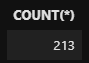

Above we chained two conditions with the boolean operator AND. Other boolean operators are the same in SQL. 

Now, let's see all the invoices that has Paris or Berlin as a billing city:

```sql
%%sql

SELECT BillingAddress, BillingCity, Total
FROM invoices
WHERE BillingCity = 'Paris' OR BillingCity = 'Berlin'
LIMIT 5

--invoices[(invoices['BillingCity'] == 'Paris') &
--         (invoices['BillingCity'] == 'Berlin')]
```

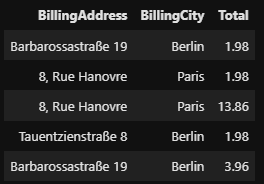

Equality operator in SQL requires only one '=' (equal) sign. The inequality operator is represented with either '!=' or '<>' operators:

```sql
%%sql

SELECT BillingAddress, BillingCity, Total
FROM invoices
WHERE BillingCity != 'Paris' AND BillingCity <> 'Berlin'
LIMIT 5
```

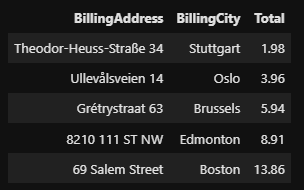

### Easier Filtering With BETWEEN And IN

Some similar conditionals are used very often and writing them out with simple booleans becomes cumbersome. For example, Pandas has `.isin()` function which checks if a value belongs to a list of groups or values. If we wanted to select all invoices for 5 cities, we would have to write 5 chained conditions. Luckily, SQL supports a similar IN operator like `.isin()`:

```sql
%%sql

SELECT * 
  FROM invoices
 WHERE BillingCity IN ('Berlin', 'Paris', 'New York', 'Boston', 'London')
 LIMIT 5
    
--invoices[invoices['BillingCity'].isin(
--      ('Berlin', 'Paris', 'New York', 'Boston', 'London')
--)]
```

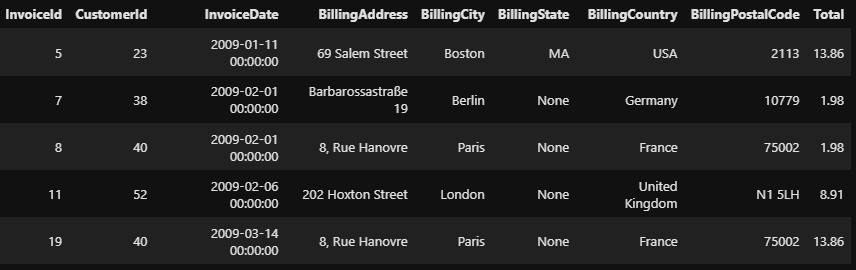

The list of values after IN should be given as a tuple, not as a list. You can also negate the condition with the NOT keyword:

```sql
%%sql

SELECT * 
  FROM invoices
 WHERE BillingCity NOT IN ('Berlin', 'Paris', 'New York', 'Boston', 'London')
 LIMIT 5
    
--invoices[~invoices['BillingCity'].isin(
--    ('Berlin', 'Paris', 'New York', 'Boston', 'London')
--)]
```

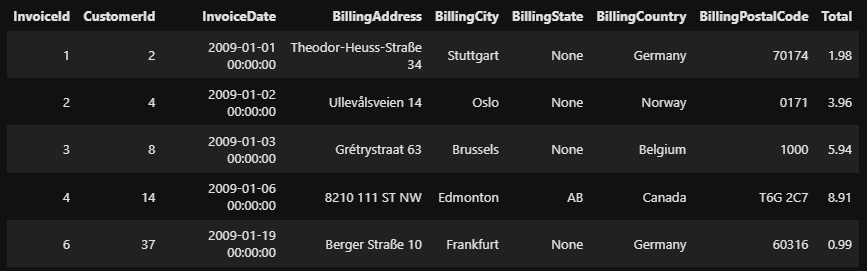

Another common filtering operation on numeric columns is to select values within a range. For this, BETWEEN keyword can be used, which is equivalent to `pd.Series.between()`:

```sql
%%sql

SELECT BillingCity, Total
FROM invoices
WHERE Total BETWEEN 5 AND 15
LIMIT 5

--invoices[invoices['Total'].between(5, 15)]
```

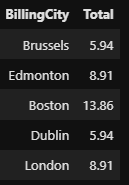

### Checking For Nulls

Every data source has missing values and databases are no exception. Just like there are a number of ways to explore the missing values in Pandas, there are certain keywords that check the existence of null values in SQL. The below query counts the number of rows there are missing values in BillingState:

```sql
%%sql

SELECT COUNT(*) FROM
invoices
WHERE BillingState IS NULL

--invoices['BillingState'].isnull().sum()
```

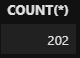

You can add the NOT keyword between IS and NULL to filter out missing values of a particular column:

```sql
%%sql

SELECT InvoiceDate, BillingCountry 
FROM invoices
WHERE Total IS NOT NULL
LIMIT 10
```

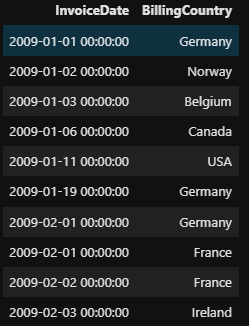

### Better String Matching With LIKE

In the WHERE clause, we were able to filter columns based on exact text values. But often, we may want to filter textual columns based on a pattern. In Pandas and pure Python, we would use regular expressions for pattern matching, which are very powerful but requires time to master. 

As an alternative, SQL offers '%' wildcard as a placeholder to mach any character 0 or more times. For example, 'gr%' string matches 'great', 'groom', 'greed' and '%ex%' matches any text that has 'ex' in the middle, etc. Let's see how to use it with SQL:

```sql
%%sql

SELECT Name, Composer, UnitPrice 
  FROM tracks
 WHERE Name LIKE 'B%'
 LIMIT 5

--tracks[tracks['Name'].str.startswith('B')]
```

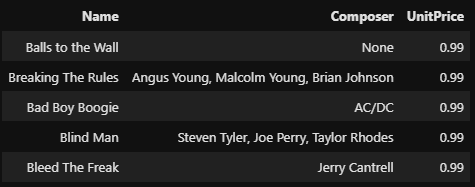

Above query finds all sons that starts with 'B'. The string that contains the wildcard should come after the LIKE keyword.

Now, let's find all songs that contain the word 'beautiful' in their titles:

```sql
%%sql

SELECT Name, Composer, UnitPrice
  FROM tracks
 WHERE Name LIKE '%beautiful%'

--tracks[tracks['Name'].str.contains('beautiful')]
```

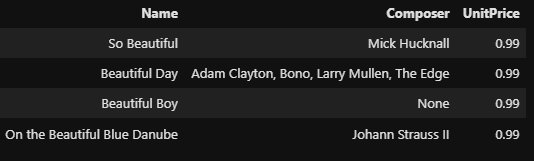

You can also use other boolean operators next to LIKE:

```sql
%%sql

SELECT Name, Composer, UnitPrice
  FROM tracks
 WHERE (Name LIKE 'F%') AND (UnitPrice > 1.0)

--tracks[(tracks['Name'].str.startswith('F')) & (tracks['UnitPrice'] > 1.0)]
```

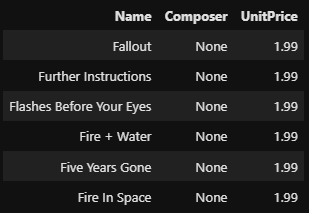

There are many other wildcards in SQL that behave similarly. You can see the full list and their usage [here](https://www.w3schools.com/sql/sql_wildcards.asp).

### Aggregate Functions in SQL

It is also possible to perform basic arithmetic operations on columns. These operations are called aggregate functions in SQL and the most common ones are `AVG, SUM, MIN, MAX`. Their functionality should be from their names:

```
%%sql 

SELECT SUM(Total), MAX(Total), MIN(Total), AVG(Total)
FROM invoices
```

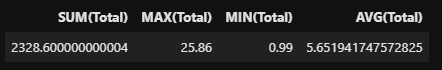

Aggregate functions give only a single result for the column they were used on. This means you cannot aggregate across one column and select other unaggregated columns:

```sql
%%sql

SELECT AVG(Total), BillingCity, BillingAddress
FROM invoices;

-- the result will be a single row because
-- of the presence of aggregate functions
```

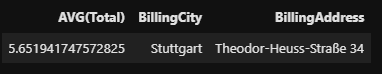

You can combine aggregate functions with conditionals using WHERE clauses just as easily:

```sql
%%sql

SELECT AVG(Total), BillingCity
FROM invoices
WHERE BillingCity = 'Paris'

-- invoices[invoices['BillingCity']]['Total'].mean()
```

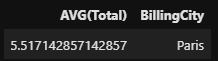

It is also possible to use arithmetic operators such as +, -, \*, / on columns and on simple numbers. When used on columns, the operation is performed element-wise:

```sql
%%sql

SELECT SUM(Total) / COUNT(Total)
FROM invoices

-- finding the mean manually
```

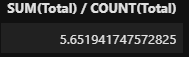

One thing to note about arithmetic operations: if you perform operations on only integers, SQL thinks that you are expecting an integer as the answer:

```sql
%%sql 

SELECT 10 / 3
```

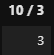

Instead of returning 3.33..., the result is 3. To get a float result, you should use at least one float in the query or use all floats to be safe:

```sql
%%sql 

SELECT 10.0 / 3.0
```

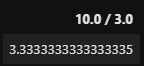

Using this knowledge, let's calculate the average duration of a song in minutes:

```sql
%%sql

SELECT Milliseconds / 1000.0 / 60.0
FROM tracks
LIMIT 10
```

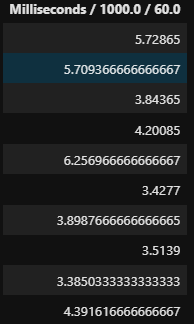

If you pay attention to the above result, the column name is written as the query that was used to generate that column. When using large calculations, such as finding the standard deviation or variance of a column, this can be an issue because the column name will be as large as the query itself. 

To avoid this, SQL allows aliasing which is similar to aliasing import statements in Python. For example:

```sql
%%sql

SELECT SUM(Total) as sum_total
FROM invoices
```

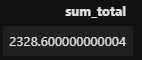

Using `as` keyword after a single item in a `SELECT` statement tells SQL that we are aliasing. Here are more examples:

```sql
%%sql

SELECT SUM(Total) as sum_total,
       MAX(Total) as max_total,
       MIN(Total) as min_total,
       SUM(Total) / COUNT(Total) as mean_total
FROM invoices
```

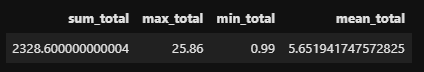

You can use aliasing just as easily for simple columns with long names. 

### Ordering Results in SQL

Just like Pandas has `sort_values` method, SQL supports ordering columns via `ORDER BY` clause. Passing a column name after it sorts the results in ascending order:

```sql
%%sql

SELECT Name, Composer, UnitPrice
FROM tracks
WHERE Composer <> 'None'
ORDER BY Composer
LIMIT 10

-- tracks.sort_values('Compose')[['Name', 'Compose', 'UnitPrice']]
```

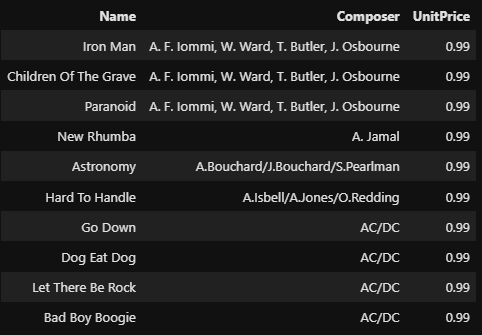

We are ordering the tracks table in ascending order by the composer name. Note that ORDER BY statement should always come after the WHERE clause. It is also possible to pass 2 or more columns to ORDER BY:

```sql
%%sql

SELECT Name, Composer, UnitPrice
FROM tracks
WHERE Composer <> 'None'
ORDER BY UnitPrice, Composer, Name
LIMIT 10

-- tracks.sort_values(['UnitPrice', 'Composer', 'Name'])[['Name', 'Compose', 'UnitPrice']]
```

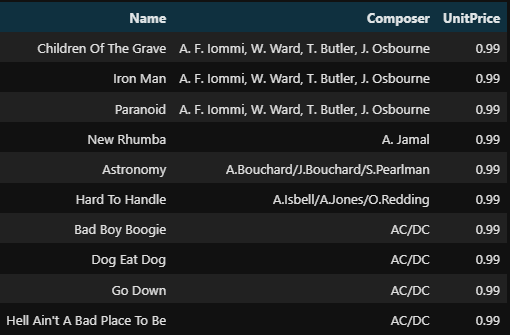

You can also reverse the ordering by passing the `DESC` keyword after each column name:

```sql
%%sql

SELECT Name, Composer, UnitPrice
FROM tracks
WHERE Composer != 'None'
ORDER BY UnitPrice DESC, Composer DESC, Name ASC
LIMIT 10

-- tracks.sort_values(['UnitPrice', 'Composer', 'Name'])[['Name', 'Compose', 'UnitPrice']]
```

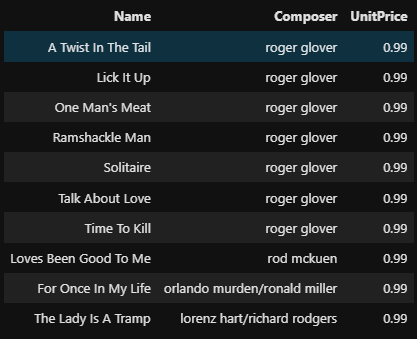

The above query returns 3 columns after ordering the UnitPrice and Compose in descending order and the name in ascending order (`ASC` is a default keyword).

### Grouping in SQL

One of the most powerful functions in Pandas is the `groupby`. It can be used to transform a table into virtually any shape you want. Its very close cousin in SQL - `GROUP BY` clause can be used to achieve the same functionality. For example, below query counts the number of songs in each genre:

```sql
%%sql

SELECT GenreID, COUNT(*) as genre_count
FROM tracks
GROUP BY GenreId
LIMIT 10

-- tracks.groupby('GenreId')['GenreID'].count()
```

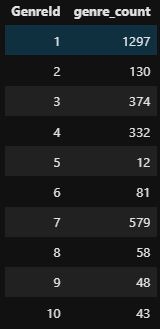

The difference between the GROUP BY in SQL and `groupby` in Pandas is that SQL does not allow selecting columns which weren't given in the GROUP BY clause. For example, adding an extra free column in the above query generates an error:

```sql
%%sql

SELECT Name, GenreID, COUNT(*) as genre_count
FROM tracks
GROUP BY GenreId

syntax error at or near "GROUP"
LINE 1: GROUP BY GenreId;
```



However, you can choose as many columns in the SELECT statement as you like as long as you are using some type of aggregate function on them:

```sql
%%sql

SELECT GenreId, AlbumId, 
       COUNT(*) as genre_count,
       AVG(Milliseconds) / 1000.0 / 60.0 as avg_duration,
       AVG(UnitPrice) as avg_price
  FROM tracks
 GROUP BY GenreId, AlbumId
 LIMIT 10
```

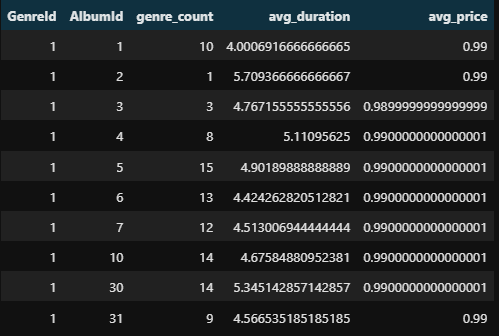

The above query includes almost all the topics we have learned up to this point. We are grouping by both album ID and genre ID and for each group, we are calculating average duration and price of a song. We are also making an efficient use of aliasing. 

We can make the above query even more powerful by ordering by the average duration and genre count:

```sql
%%sql

SELECT GenreId, AlbumId, 
       COUNT(*) as genre_count,
       AVG(Milliseconds) / 1000.0 / 60.0 as avg_duration,
       AVG(UnitPrice) as avg_price
  FROM tracks
 GROUP BY GenreId, AlbumId
 ORDER BY avg_duration DESC, genre_count DESC
 LIMIT 10
 ```

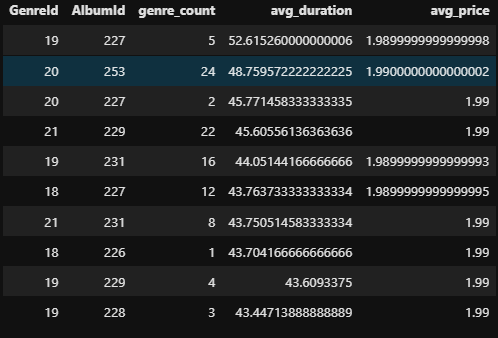

If you pay attention, we are using the alias names of the aggregate functions in the ORDER BY clause. Once you alias a column or the result of the aggregate function, you can refer to them only by their alias for the rest of the query.

### Using conditionals with HAVING

By default, SQL does not allow conditional filtering using aggregate functions in the WHERE clause. For example, we want to select only the genres where the number of songs are greater than 100. Let's try this with WHERE clause:

```sql
%%sql

SELECT GenreId
FROM tracks
GROUP BY GenreId
WHERE COUNT(GenreId) > 10

syntax error at or near "WHERE"
LINE 1: where COUNT(GenreId) > 10;
```

The correct way of filtering rows based on the results of aggregate functions is using the HAVING clause:

```sql
%%sql

SELECT GenreId
FROM tracks
GROUP BY GenreId
HAVING COUNT(GenreId) > 100
```

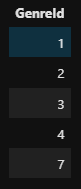

HAVING clause is usually used with GROUP BY. Whenever you want to filter rows based using aggregate functions, HAVING is the way to go!

### Summary

By now, you should have realized how powerful SQL can be. Even though we learned a ton, we have barely scratched the surface. For more advanced topics, you can read the [excellent guide on W3Schools](https://www.w3schools.com/sql/default.Asp) and practice your querying skills by solving real-world SQL questions on [Hackerrank](https://www.hackerrank.com/) or [LeetCode](https://leetcode.com/). Thank you for reading!

### You might also be interested...
- [5 Uncommon Storage Files in Python](https://towardsdev.com/importing-matlab-sas-stata-hdf5-pickle-excel-307810bb4c42?source=your_stories_page-------------------------------------)
- [Storing Digital Files in Remote SQL Databases In Python](https://towardsdev.com/storing-digital-files-in-remote-sql-databases-in-python-73494f09d39b?source=your_stories_page-------------------------------------)